In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'C:/Users/KIIT/Downloads/trail_dataset/train'
valid_path = 'C:/Users/KIIT/Downloads/trail_dataset/test'

In [2]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [3]:
# don't train existing weights
for layer in resnet.layers:
  layer.trainable = False

  # useful for getting number of classes
folders = glob('C:/Users/KIIT/Downloads/trail_dataset/train/*')
x = Flatten()(resnet.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=resnet.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 23,788,418 (90.75 MB)

 Trainable params: 200,706 (784.01 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [4]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('C:/Users/KIIT/Downloads/trail_dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('C:/Users/KIIT/Downloads/trail_dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 724 images belonging to 2 classes.
Found 126 images belonging to 2 classes.


In [5]:
# Fit the model
r = model.fit(
    training_set,                # Training data
    validation_data=test_set,    # Validation data
    epochs=5,                    # Number of epochs
    steps_per_epoch=len(training_set),    # Steps per epoch
    validation_steps=len(test_set)        # Validation steps
)


C:\Users\KIIT\AppData\Roaming\Python\Python39\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 91s 3s/step - accuracy: 0.5600 - loss: 2.8175 - val_accuracy: 0.8730 - val_loss: 0.3719
Epoch 2/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 317s 14s/step - accuracy: 0.7992 - loss: 0.4347 - val_accuracy: 0.8889 - val_loss: 0.3158
Epoch 3/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 73s 3s/step - accuracy: 0.8465 - loss: 0.4185 - val_accuracy: 0.8889 - val_loss: 0.2929
Epoch 4/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 74s 3s/step - accuracy: 0.8224 - loss: 0.3734 - val_accuracy: 0.8571 - val_loss: 0.3928
Epoch 5/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - accuracy: 0.7752 - loss: 0.5045 - val_accuracy: 0.9048 - val_loss: 0.2661


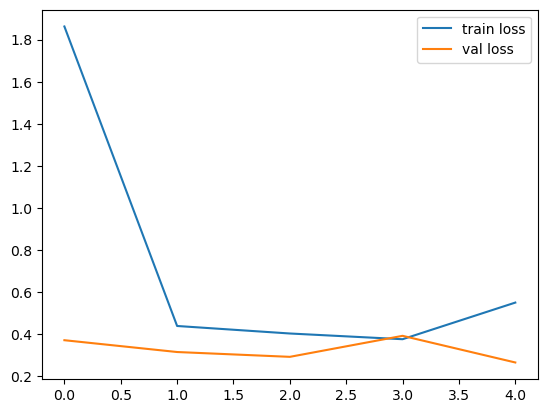

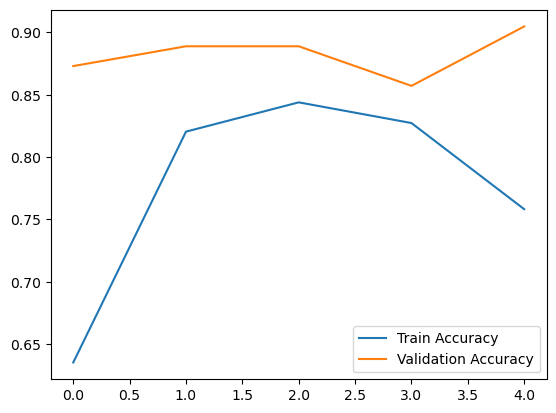

<Figure size 640x480 with 0 Axes>

In [6]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='Train Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')

plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [7]:
import tensorflow as tf

from keras.models import load_model

model.save('skindiseasedetection_new_model_resnet.h5')

In [8]:
from keras.models import load_model

# Load the saved model
model = load_model('skindiseasedetection_new_model_resnet.h5')

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_set)

# Convert accuracy to percentage
accuracy_percentage = test_accuracy * 100

# Print the accuracy
print(f"Model Test Accuracy: {accuracy_percentage:.2f}%")


4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.9129 - loss: 0.2232
Model Test Accuracy: 90.48%


4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step


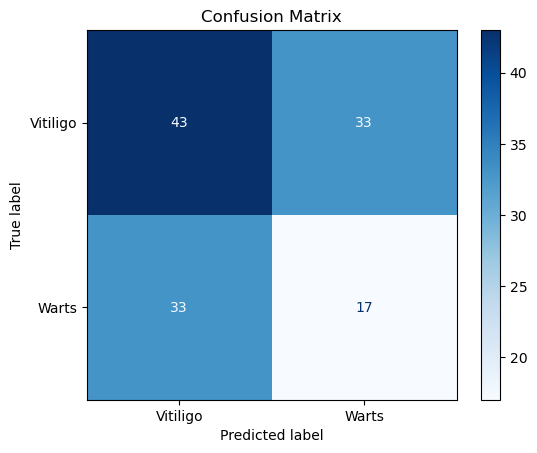

Classification Report:
              precision    recall  f1-score   support

    Vitiligo       0.57      0.57      0.57        76
       Warts       0.34      0.34      0.34        50

    accuracy                           0.48       126
   macro avg       0.45      0.45      0.45       126
weighted avg       0.48      0.48      0.48       126



In [9]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming `test_set` is the test dataset and `model` is your trained model

# Get true labels and predicted labels
test_labels = test_set.classes  # True labels from the test set
class_names = list(test_set.class_indices.keys())  # Class names
predictions = model.predict(test_set)  # Predictions
predicted_labels = np.argmax(predictions, axis=1)  # Convert probabilities to class indices

# Compute confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()

# Print classification report for precision, recall, and F1-score
report = classification_report(test_labels, predicted_labels, target_names=class_names)
print("Classification Report:")
print(report)


In [ ]:
##### Assuming 'model' is your Keras/TensorFlow model
model.summary()
